In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from warnings import filterwarnings

filterwarnings('ignore')

In [3]:
vendas = pd.read_csv(
    r'C:\Estudos\alura\data-science\10-dataviz\dados\relatorio_vendas.csv'
)

vendas['data_pedido'] = pd.to_datetime(vendas['data_pedido'], format=r'%Y-%m-%d')
vendas['data_envio'] = pd.to_datetime(vendas['data_pedido'], format=r'%Y-%m-%d')

In [4]:
vendas['tipo_produto'] = vendas['tipo_produto'].apply(lambda x: x.capitalize())

In [5]:
# Verificação de dados nulos, duplicados e datatypes

vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8940 entries, 0 to 8939
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   data_pedido          8940 non-null   datetime64[ns]
 1   data_envio           8940 non-null   datetime64[ns]
 2   modo_envio           8940 non-null   object        
 3   nome_cliente         8940 non-null   object        
 4   segmento_cliente     8940 non-null   object        
 5   cidade               8940 non-null   object        
 6   estado               8940 non-null   object        
 7   regiao               8940 non-null   object        
 8   departamento         8940 non-null   object        
 9   tipo_produto         8940 non-null   object        
 10  preco_base           8940 non-null   float64       
 11  preco_unit_sem_desc  8940 non-null   float64       
 12  desconto             8940 non-null   float64       
 13  preco_unit_venda     8940 non-nul

In [6]:
vendas.head()

,data_pedido,data_envio,modo_envio,nome_cliente,segmento_cliente,cidade,estado,regiao,departamento,tipo_produto,preco_base,preco_unit_sem_desc,desconto,preco_unit_venda,quantidade,vendas,lucro
0,2018-11-09,2018-11-09,Econômica,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,Encanamentos,409.70,445.33,0.000,445.33,2,890.66,71.26
1,2018-11-09,2018-11-09,Econômica,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,Ferramentas,705.10,829.53,0.000,829.53,3,2488.59,373.29
2,2018-06-13,2018-06-13,Econômica,Giovanna Lima,B2B,Rio de Janeiro,Rio de Janeiro,Sudeste,Jardinagem e paisagismo,Sementes,19.02,24.86,0.000,24.86,2,49.72,11.68
3,2017-10-12,2017-10-12,Entrega padrão,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sul,Materiais de construção,Materiais de revestimento,781.38,840.19,0.225,651.15,5,3255.75,-651.15
4,2017-10-12,2017-10-12,Entrega padrão,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sul,Jardinagem e paisagismo,Vasos,35.88,42.24,0.100,38.02,2,76.04,4.28


In [7]:
# Definindo a paleta de cores

AZUL1, AZUL2, AZUL3, AZUL4, AZUL5 = '#03045e', '#0077b6', "#00b4d8", '#90e0ef', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5 = '#212529', '#495057', '#adb5bd', '#dee2e6', '#f8f9fa'
VERMELHO1, LARANJA1, AMARELO1, VERDE1, VERDE2 = '#e76f51', '#f4a261',	'#e9c46a', '#4c956c', '#2a9d8f'

#### 1° pergunta: Qual o total de vendas por ano? E qual ano performou melhor em nossa base de dados?

In [8]:
# Variáveis de interesse: Total de vendas, anos

df_vendas_ano = vendas.copy() # Criando uma cópia do dataframe original

df_vendas_ano = df_vendas_ano[['data_pedido', 'vendas']] # Selecionando apenas as variáveis de interesse
df_vendas_ano['ano'] = df_vendas_ano['data_pedido'].dt.year # Separando apenas o ano
df_vendas_ano = df_vendas_ano.drop(columns='data_pedido') # Removendo a data completa

df_vendas_ano = df_vendas_ano.groupby(by='ano').agg('sum')

df_vendas_ano

,vendas
ano,
2016,1402652.33
2017,1489179.52
2018,1884161.41
2019,2305006.29


#### Criando o gráfico

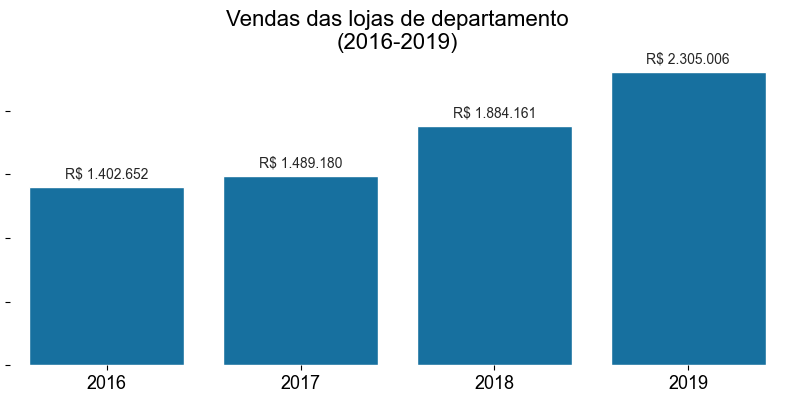

In [9]:
# Área do gráfico e tema

fig, ax = plt.subplots(figsize=(10,4))
sns.set_style('white')

# Criando gráfico de colunas

sns.barplot(data=df_vendas_ano, legend=False,
            x=df_vendas_ano.index, y='vendas',
            hue='vendas', palette=[AZUL2])

# Personalização do gráfico

ax.set_title('Vendas das lojas de departamento\n(2016-2019)',
             fontsize=16)
ax.set_xlabel('')
ax.set_ylabel('');
ax.xaxis.set_tick_params(labelsize=13)

ax.set_frame_on(False)

# Escrevendo valores em cada barra do gráfico

ax.set_yticklabels([])

for pos, valor in enumerate(df_vendas_ano['vendas']):
    qtd = f'R$ {valor:,.0f}'.replace(',', '.')
    offset = 1e5
    ax.text(pos, valor + offset, qtd, ha='center', va='center')

In [10]:
def grafico_vendas(cores: list=[AZUL2]):
    # Área do gráfico e tema

    fig, ax = plt.subplots(figsize=(10,4))
    sns.set_style('white')

    # Criando gráfico de colunas

    sns.barplot(data=df_vendas_ano, legend=False,
                x=df_vendas_ano.index, y='vendas',
                hue='vendas', palette=cores)

    # Personalização do gráfico

    ax.set_title('Vendas das lojas de departamento\n(2016-2019)',
                fontsize=16)
    ax.set_xlabel('')
    ax.set_ylabel('');
    ax.xaxis.set_tick_params(labelsize=13)

    ax.set_frame_on(False)

    # Escrevendo valores em cada barra do gráfico

    ax.set_yticklabels([])

    for pos, valor in enumerate(df_vendas_ano['vendas']):
        qtd = f'R$ {valor:,.0f}'.replace(',', '.')
        offset = 1e5
        ax.text(pos, valor + offset, qtd, ha='center', va='center')
    
    return ax

In [11]:
# ax = grafico_vendas()

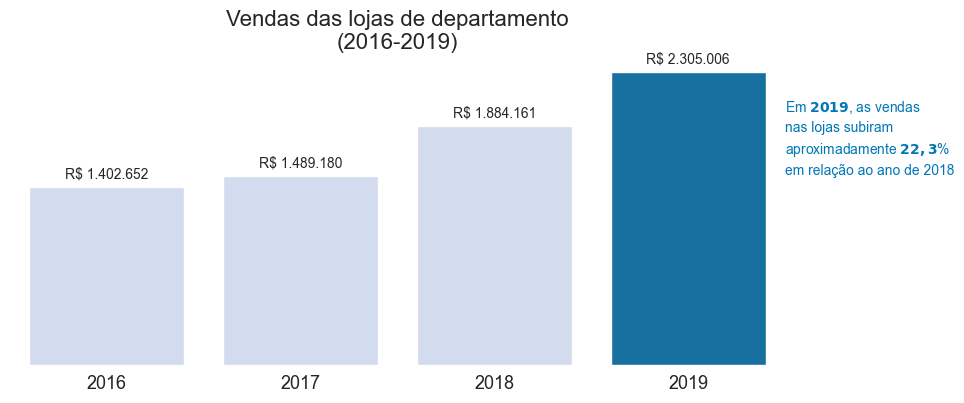

In [12]:
# Configurando o gráfico com parâmetros que potencializam a visualização dos dados

cores = []

for ano in df_vendas_ano.index:
    if df_vendas_ano.loc[ano, 'vendas'] == df_vendas_ano['vendas'].max():
        cores.append(AZUL2)
    else:
        cores.append(AZUL5)

# Chamando a função do gráfico de colunas

ax = grafico_vendas(cores=cores);

# Anotação no gráfico

ax.text(3.5, 1.5e6, # Eixo x e y que vai aparecer o texto
        'Em $\\bf{2019}$, as vendas\n'
        'nas lojas subiram\n'
        'aproximadamente $\\bf{22,3}$%\n'
        'em relação ao ano de 2018',
        fontsize=10, linespacing=1.45, color=AZUL2)

fig = ax.get_figure()

#### `Pergunta 2`: Qual é o top 7 produtos que mais apresentaram lucros no catálogo durante o período representado?

In [13]:
vendas.head(1)

,data_pedido,data_envio,modo_envio,nome_cliente,segmento_cliente,cidade,estado,regiao,departamento,tipo_produto,preco_base,preco_unit_sem_desc,desconto,preco_unit_venda,quantidade,vendas,lucro
0,2018-11-09,2018-11-09,Econômica,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,Encanamentos,409.7,445.33,0.0,445.33,2,890.66,71.26


In [14]:
# Criação de um dataframe com as colunas desejadas

top_lucro = vendas.copy(deep=True)
top_lucro = top_lucro[['tipo_produto', 'lucro']]

# Agrupamento dos dados por tipo_produto, ordenando de maneira crescente

top_lucro = top_lucro.groupby(by='tipo_produto').agg('sum').sort_values(by='lucro', ascending=False)

# Pegando apenas os 7 maiores lucros

top_7 = top_lucro.head(7)

# top_7

In [15]:
def grafico_top_7():

    # Criando a figura e os eixos

    fig, ax = plt.subplots(figsize=(10,4))
    fig.subplots_adjust(right=0.7)
    
    # Alterando o estilo do gráfico

    sns.set_style(style='darkgrid')

    # Definindo as cores

    cores = [AZUL2, AZUL2, AZUL2, VERDE1, VERDE1, CINZA3, VERDE1]

    # Gerando gráfico de barras

    ax = sns.barplot(data=top_7,
                     x='lucro', y=top_7.index,
                     palette=cores)
    
    # Personalização do gráfico

    ax.set_title('Os 7 produtos com maior lucro no catálogo\n(2016-2019)',
                 fontsize=16, color=CINZA1)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_xticklabels([])
    ax.yaxis.set_tick_params(labelsize=10, labelcolor=CINZA2)
    ax.set_frame_on(False)

    # Escrevendo os valores em cada barra do gráfico

    for i, valor in enumerate(top_7['lucro']):
        qtd = f'R$ {valor:,.0f}'.replace(',', '.')
        offset = 1e3 # offset de 1000
        ax.text(x=valor - offset, y=i, s=qtd, color=CINZA5, fontsize=10,
                fontweight='bold', ha='right', va='center')

    return ax

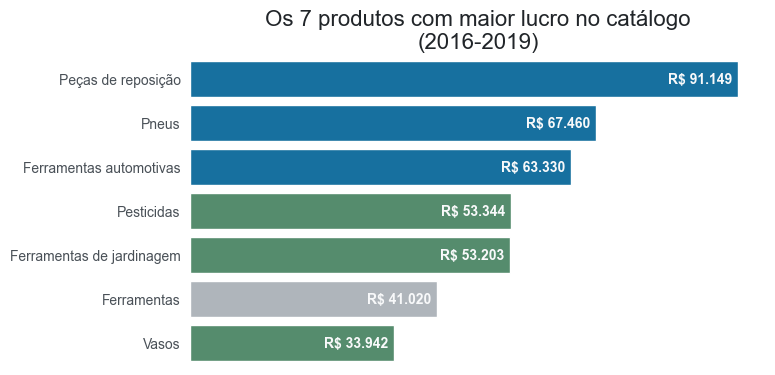

In [16]:
ax = grafico_top_7()

In [17]:
# vendas.head(1)

In [18]:
# Criando uma cópia profunda dos dados originais

df_vendas_reg = vendas.copy(deep=True)

# Selecionando apenas as colunas desejadas

df_vendas_reg = df_vendas_reg[['data_pedido', 'regiao', 'vendas']]

# Criando a coluna "Ano"

df_vendas_reg['Ano'] = df_vendas_reg['data_pedido'].dt.year

# Removendo a coluna com a data completa

df_vendas_reg = df_vendas_reg.drop(columns='data_pedido')

#### Utilizando o método cross table

In [19]:
vendas_reg = pd.crosstab(index=df_vendas_reg['Ano'],
                         columns=df_vendas_reg['regiao'],
                         values=df_vendas_reg['vendas'],
                         aggfunc='sum')

vendas_reg = vendas_reg[['Sudeste',
                         'Nordeste',
                         'Centro-Oeste',
                         'Norte',
                         'Sul']]

In [20]:
# vendas_reg

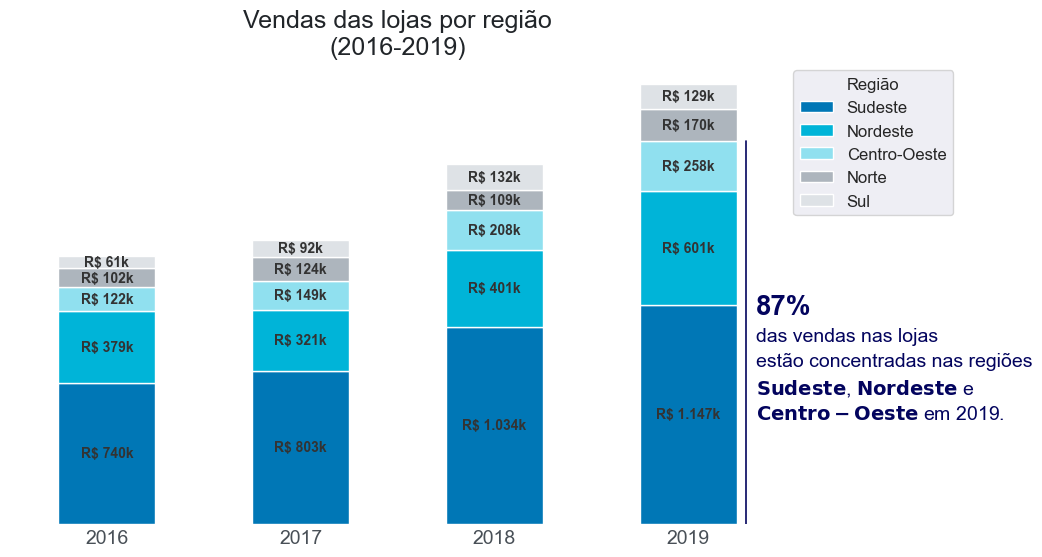

In [21]:
def gerar_vendas_regiao():
    # Definindo cores do gráfico
    
    cores = [AZUL2, AZUL3, AZUL4, CINZA3, CINZA4]

    # Gráfico de colunas empilhadas

    ax = vendas_reg.plot(kind='bar', stacked=True,
                         figsize=(10, 6), color=cores)
    
    # Personalização do gráfico

    ax.set_title('Vendas das lojas por região\n(2016-2019)',
                 fontsize=18, color=CINZA1)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_yticklabels([])
    ax.xaxis.set_tick_params(labelsize=14, labelcolor=CINZA2, rotation=0)
    ax.set_frame_on(False)

    ax.tick_params(axis='both', which='both', length=0)

    # Anotando uma conclusão no gráfico
    
    ax.text(3.35, 1.1e6, '87%', fontweight='bold', fontsize=20, color=AZUL1)
    ax.text(3.35, 5.5e5,
        'das vendas nas lojas\n'
        'estão concentradas nas regiões\n'
        '$\\bf{Sudeste}$, $\\bf{Nordeste}$ e\n'
        '$\\bf{Centro-Oeste}$ em 2019.',
        fontsize=14,
        linespacing=1.45,
        color=AZUL1)
    
    # Personalização da legenda

    ax.legend(bbox_to_anchor=(1,1), title='Região',
              title_fontsize=12, fontsize=12)
    
    # Adicionando os valores

    for container in ax.containers:
        labels = [
            f'R$ {valor.get_height()/1000:,.0f}k'.replace(',', '.') for valor in container
        ]
        ax.bar_label(container, label_type='center', labels=labels,
                     color='#333333', fontweight='bold')
        
    ax.axvline(x=3.3, ymin=0, ymax=0.83,
               color=AZUL1, linewidth=1.2)


    return ax

ax = gerar_vendas_regiao()

#### `Pergunta 3`: Qual o modo de envio mais utilizado pelos clientes da loja? É proporcional para B2B e B2C?

In [22]:
# Tratamento dos dados para visualização

df_envio = vendas.copy(deep=True)
df_envio = df_envio[['modo_envio', 'segmento_cliente']]

df_envio_seg = pd.crosstab(index=df_envio['modo_envio'],
                           columns=df_envio['segmento_cliente'])

In [23]:
df_envio_normalizado = pd.crosstab(index=df_envio['modo_envio'],
                           columns=df_envio['segmento_cliente'],
                           normalize='index')

In [24]:
df_envio_seg

segmento_cliente,B2B,B2C
modo_envio,,
24 horas,207,288
Econômica,829,906
Entrega padrão,2552,2809
Envio rápido,676,673


In [25]:
# Geração do grafico

from matplotlib import transforms

def texto_colorido(x, y, texto, cores, esp=20, ax=None, **kw):
    cores = list(reversed(cores))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, linha in enumerate(reversed(texto.split('\n'))):
        frases = linha.split('||')
        for s, cor in zip(frases, cores[i]):
            texto = ax.text(x, y, s, color=cor, transform=t, **kw)
            texto.draw(canvas.get_renderer())
            ex = texto.get_window_extent()
            t = transforms.offset_copy(texto._transform, x=ex.width, units='dots')
        
        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * esp, units='dots')

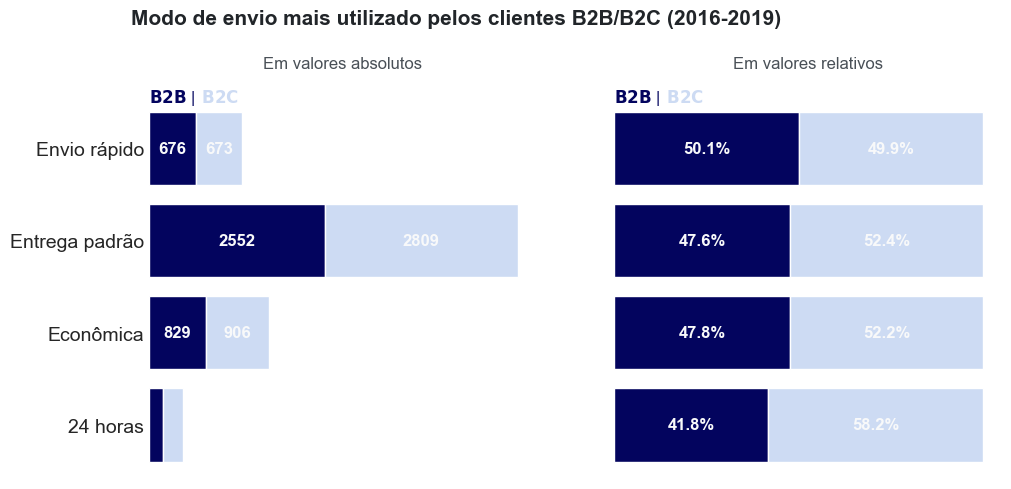

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(11,5), sharey=True)

cores = [AZUL1, AZUL5]

# Título superior

fig.suptitle('Modo de envio mais utilizado pelos clientes B2B/B2C (2016-2019)\n',
             fontsize=15, color=CINZA1, ha='right', x=0.7, y=1.05, fontweight='bold')

# Gráfico 1: Barras empilhadas

axs[0].barh(df_envio_seg.index, df_envio_seg['B2B'], color=cores[0])
axs[0].barh(df_envio_seg.index, df_envio_seg['B2C'], color=cores[1],
            left=df_envio_seg['B2B'])

axs[0].set_title('Em valores absolutos\n', color=CINZA2)
axs[0].set_xlabel('')
axs[0].set_ylabel('')
axs[0].set_xticklabels([])
axs[0].yaxis.set_tick_params(labelsize=14, color=CINZA2)
axs[0].set_frame_on(False)

# Remoção dos ticks de ambos os eixos

axs[0].tick_params(axis='both', which='both', length=0)

texto_colorido(
    x=0,
    y=3.5,
    texto='$\\bf{B2B}$ | || $\\bf{B2C}$',
    cores=[cores],
    ax=axs[0],
    fontsize=12
)

# Gráfico 2: Barras emplilhadas em valores relativos

axs[1].barh(df_envio_normalizado.index, df_envio_normalizado['B2B'],
            color=cores[0])
axs[1].barh(df_envio_normalizado.index, df_envio_normalizado['B2C'],
            left=df_envio_normalizado['B2B'], color=cores[1])
axs[1].set_title('Em valores relativos\n', color=CINZA2)
# axs[1].set_xlabel('100%', color=CINZA2, size=14, loc='right')
axs[1].set_xticklabels([])
axs[1].set_frame_on(False)

# Remoção dos ticks

axs[1].tick_params(axis='both', which='both', length=0)

texto_colorido(x=0, y=3.5,
               texto='$\\bf{B2B}$ | || $\\bf{B2C}$',
               cores=[cores],
               ax=axs[1],
               fontsize=12)

# Valores nas barras

for container in axs[0].containers:
    labels = [str(valor.get_width()) if valor.get_width() > 300 else '' for valor in container]
    axs[0].bar_label(container, label_type='center', labels=labels, size=12, color=CINZA5, fontweight='bold')
    
for container in axs[1].containers:
    labels = [f'{valor.get_width()*100:.1f}%' for valor in container]
    axs[1].bar_label(container, label_type='center', labels=labels, size=12, color=CINZA5, fontweight='bold')

plt.show()